# OSU Carpentry Community March 22, 2018 - Internal Workshop

### Title: Statistics, Plotting and Programming in Python 🐍

**Nathalia Graf-Grachet**

The material I prepared is a combination of codes found in [Programming with Python](http://swcarpentry.github.io/python-novice-inflammation/) and [Plotting and Programming with Python](http://swcarpentry.github.io/python-novice-gapminder/). 

Additional links that I found useful: [Marker options](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_star_poly.html#sphx-glr-gallery-lines-bars-and-markers-scatter-star-poly-py), [All possible markers](https://matplotlib.org/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle), [Color names](https://matplotlib.org/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py), [Statistical analysis](http://cleverowl.uk/2015/07/01/using-one-way-anova-and-tukeys-test-to-compare-data-sets/), [Saving plots to file](http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/), [Aggregation and Grouping](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), [Plotting](http://bioinformatics.igc.gulbenkian.pt/ubi/sites/bioinformatics.igc.gulbenkian.pt/files/Matplotlib_Tutorial_1.html)

### GOALS:

1. Statistical analysis consisting of an ANOVA and a Tukey test.  
2. Plot data in publication quality figures.  
3. Create an executable python script to analyze future files more efficiently.  

### Information about the data set:

Nathalia's Redemption...

This is a data set from crop science that I took from Dr. Smith's (Dep. Horticulture and Landscape) class (Spring of 2015).

The objective of the study was to evaluate the effect of foliar applications of nitrogen (N) in urea form (46% N) on pecan yield and N content of leaves. ‘Pawnee’ was the pecan cultivar of this experiment. There were a total of three N applications, and rates were 0, 0.2, 0.4, 0.6 and 0.8% N. There wasn't much information about this unit, normally it reflects amount of N (in kg or lbs) per amount of water (in liters of gallons) used in the spray. Leaf samples were collected in July and October, and N content of leaves was determined with a Leco N analyzer. Pecans were harvested in November, and weighed. The experiment consisted of a Completely Randomized Block Design with 10 replications. 

In [1]:
# always import packages first

In [2]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

## Getting to know the data

In [3]:
# import data 
pecan_data = pd.read_csv('data/Smith_pecan_data.csv')

In [4]:
# check how data looks like
pecan_data.head(15)

,n_rate,rep,july,oct,yield
0,0.0,1,2.57,2.03,12
1,0.0,2,2.78,2.12,19
2,0.0,3,2.47,2.16,22
3,0.0,4,2.59,2.09,30
4,0.0,5,2.53,2.00,18
5,0.0,6,2.33,1.97,22
6,0.0,7,2.50,2.04,23
7,0.0,8,2.64,2.10,.
8,0.0,9,2.37,1.90,.
9,0.0,10,2.59,1.87,38


In [5]:
# the '.' represent missing data
# add "na_values='.' " to substitute '.' with 'NaN'
pecan_data = pd.read_csv('data/Smith_pecan_data.csv', na_values='.')
pecan_data.head(15) # notice rows 7 & 8

,n_rate,rep,july,oct,yield
0,0.0,1,2.57,2.03,12.0
1,0.0,2,2.78,2.12,19.0
2,0.0,3,2.47,2.16,22.0
3,0.0,4,2.59,2.09,30.0
4,0.0,5,2.53,2.00,18.0
5,0.0,6,2.33,1.97,22.0
6,0.0,7,2.50,2.04,23.0
7,0.0,8,2.64,2.10,NaN
8,0.0,9,2.37,1.90,NaN
9,0.0,10,2.59,1.87,38.0


In [6]:
# slice data using a column header
pecan_data['yield'].head(15)

0     12.0
1     19.0
2     22.0
3     30.0
4     18.0
5     22.0
6     23.0
7      NaN
8      NaN
9     38.0
10    16.0
11    22.0
12    26.0
13    43.0
14    13.0
Name: yield, dtype: float64

In [7]:
# check data types
pecan_data.dtypes 

n_rate    float64
rep         int64
july      float64
oct       float64
yield     float64
dtype: object

In [8]:
# object == str

In [9]:
pecan_data.shape # (rows, columns)

(53, 5)

In [10]:
# column headers
pecan_data.columns 

Index(['n_rate', 'rep', 'july', 'oct', 'yield'], dtype='object')

In [11]:
# unique entries (treatments in this case)
pecan_data['n_rate'].unique()

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

In [12]:
# test for missing data
# returns a bool
pecan_data.isnull().any()

n_rate    False
rep       False
july      False
oct       False
yield      True
dtype: bool

In [13]:
# True = missing data
# False = no missing data

In [14]:
# test for missing data in a specific column:
pecan_data['yield'].isnull().any()

True

In [15]:
# remove entire rows that contain missing values
# store as 'filtered' 
filtered_pecan_data = pecan_data.dropna()
filtered_pecan_data.head(10) # removed rows 7 & 8 

,n_rate,rep,july,oct,yield
0,0.0,1,2.57,2.03,12.0
1,0.0,2,2.78,2.12,19.0
2,0.0,3,2.47,2.16,22.0
3,0.0,4,2.59,2.09,30.0
4,0.0,5,2.53,2.00,18.0
5,0.0,6,2.33,1.97,22.0
6,0.0,7,2.50,2.04,23.0
9,0.0,10,2.59,1.87,38.0
10,0.2,1,2.64,2.18,16.0
11,0.2,2,2.73,2.07,22.0


In [16]:
filtered_pecan_data.isnull().any()

n_rate    False
rep       False
july      False
oct       False
yield     False
dtype: bool

In [17]:
# Great!

## Statistics

In [18]:
# obtain descriptive statistics of yield grouped by nitrogen rates
groupby_nrate = filtered_pecan_data.groupby('n_rate')
groupby_nrate['yield'].describe()

,count,mean,std,min,25%,50%,75%,max
n_rate,,,,,,,,
0.0,8.0,23.000000,7.910210,12.0,18.75,22.0,24.75,38.0
0.2,10.0,24.200000,10.432854,13.0,16.50,22.5,25.25,43.0
0.4,9.0,33.222222,14.754472,13.0,22.00,36.0,44.00,56.0
0.6,9.0,37.888889,15.202339,18.0,23.00,34.0,49.00,57.0
0.8,13.0,40.153846,11.717837,16.0,35.00,40.0,48.00,55.0


In [19]:
# One-way ANOVA & Tukey's test
# default value alpha=0.05
# Effect of rate of N application on pecan yield
F1, p1 = stats.f_oneway(filtered_pecan_data['yield'], filtered_pecan_data['n_rate'])
mc = MultiComparison(filtered_pecan_data['yield'], filtered_pecan_data['n_rate'])
result = mc.tukeyhsd()
print ('One-way ANOVA')
print ('=============')
print ('F value:', F1)
print ('P value:', p1)
print ('=============', '\n')
print(result)

One-way ANOVA
F value: 264.253465167
P value: 2.55386997335e-29

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
 0.0    0.2     1.2    -15.3932 17.7932 False 
 0.0    0.4   10.2222  -6.7758  27.2202 False 
 0.0    0.6   14.8889  -2.1091  31.8869 False 
 0.0    0.8   17.1538   1.4346  32.8731  True 
 0.2    0.4    9.0222  -7.0507  25.0951 False 
 0.2    0.6   13.6889   -2.384  29.7618 False 
 0.2    0.8   15.9538   1.2398  30.6679  True 
 0.4    0.6    4.6667  -11.8238 21.1571 False 
 0.4    0.8    6.9316  -8.2374  22.1006 False 
 0.6    0.8    2.265   -12.9041  17.434 False 
----------------------------------------------


In [20]:
# One-way ANOVA & Tukey's test
# Effect of rate of N application on N content of leaves in July
F2, p2 = stats.f_oneway(filtered_pecan_data['july'], filtered_pecan_data['n_rate'])
mc = MultiComparison(filtered_pecan_data['july'], filtered_pecan_data['n_rate'])
result2 = mc.tukeyhsd()
print ('One-way ANOVA')
print ('=============')
print ('F value:', F2)
print ('P value:', p2)
print ('=============', '\n')
print(result2)

One-way ANOVA
F value: 1938.11590693
P value: 1.84900465231e-65

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.0    0.2    -0.01   -0.2309 0.2109 False 
 0.0    0.4   -0.0094  -0.2357 0.2168 False 
 0.0    0.6   -0.0606  -0.2868 0.1657 False 
 0.0    0.8   -0.0442  -0.2535 0.165  False 
 0.2    0.4    0.0006  -0.2134 0.2145 False 
 0.2    0.6   -0.0506  -0.2645 0.1634 False 
 0.2    0.8   -0.0342  -0.2301 0.1616 False 
 0.4    0.6   -0.0511  -0.2706 0.1684 False 
 0.4    0.8   -0.0348  -0.2367 0.1671 False 
 0.6    0.8    0.0163  -0.1856 0.2182 False 
--------------------------------------------


In [21]:
# One-way ANOVA & Tukey's test
# Effect of rate of N application on N content of leaves in October
F3, p3 = stats.f_oneway(filtered_pecan_data['oct'], filtered_pecan_data['n_rate'])
mc = MultiComparison(filtered_pecan_data['oct'], filtered_pecan_data['n_rate'])
result3 = mc.tukeyhsd()
print ('One-way ANOVA')
print ('=============')
print ('F value:', F3)
print ('P value:', p3)
print ('=============', '\n')
print(result3)

One-way ANOVA
F value: 1314.78048369
P value: 7.93632625136e-58

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.0    0.2    -0.005  -0.1608 0.1508 False 
 0.0    0.4    0.0239  -0.1357 0.1835 False 
 0.0    0.6    0.0328  -0.1268 0.1924 False 
 0.0    0.8    0.0173  -0.1303 0.1649 False 
 0.2    0.4    0.0289   -0.122 0.1798 False 
 0.2    0.6    0.0378  -0.1131 0.1887 False 
 0.2    0.8    0.0223  -0.1158 0.1605 False 
 0.4    0.6    0.0089  -0.1459 0.1637 False 
 0.4    0.8   -0.0066   -0.149 0.1358 False 
 0.6    0.8   -0.0155  -0.1579 0.1269 False 
--------------------------------------------


## Plotting

In [22]:
# Column indexing and aggregate 
groupby_nrate_yield = filtered_pecan_data.groupby('n_rate')['yield'].mean()
groupby_nrate_yield

n_rate
0.0    23.000000
0.2    24.200000
0.4    33.222222
0.6    37.888889
0.8    40.153846
Name: yield, dtype: float64

In [23]:
# setting data 
data_to_boxplot = pd.DataFrame({'n_rate': filtered_pecan_data['n_rate'].unique(), 'yield': filtered_pecan_data.groupby('n_rate')['yield'].mean()})
data_to_boxplot.head(10)

,n_rate,yield
n_rate,,
0.0,0.0,23.000000
0.2,0.2,24.200000
0.4,0.4,33.222222
0.6,0.6,37.888889
0.8,0.8,40.153846


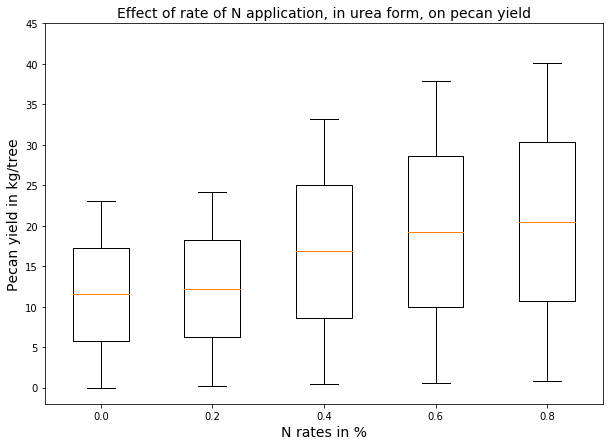

In [24]:
# boxplot
# Effect of rate of N application on pecan yield
#filtered_pecan_data.boxplot('yield', by='n_rate', figsize=(8, 6), fontsize=12) #title='Effect of rate of N on pecan yield')
fig1 = plt.figure(1, figsize=(10, 7)) # setting plot dimensions

ax = fig1.add_subplot(111) # create axes
ax.set_title('Effect of rate of N application, in urea form, on pecan yield', fontsize=14) # set title
bx = ax.boxplot(data_to_boxplot) # plot data
ax.set_xlabel('N rates in %', fontsize=14) # x label
ax.set_ylabel('Pecan yield in kg/tree', fontsize=14) # y label
ax.set_yticks(np.arange(0, 46, 5)) # set y ticks 
ax.set_xticklabels(np.arange(0,0.9,0.2)) # set x ticklabels

fig1.savefig('jnb_boxplot_N_yield.png', bbox_inches='tight')

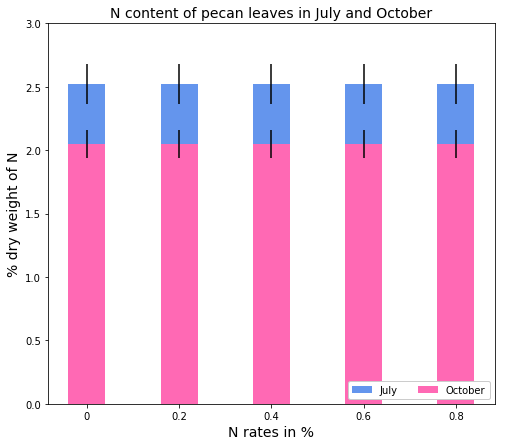

In [25]:
# bar plot
N=5
ind = np.arange(N) # for x axis

#setting data means and std
july_mean = filtered_pecan_data['july'].mean()
july_std = filtered_pecan_data['july'].std()
oct_mean = filtered_pecan_data['oct'].mean()
oct_std = filtered_pecan_data['oct'].std()

fig2 = plt.figure(1, figsize=(8, 7))
width=0.4 # of the bar
#p1 = plt.bar(ind, july_mean, width, yerr=july_std, color='cornflowerblue')
#p2 = plt.bar(ind, oct_mean, width, yerr=oct_std, color='hotpink')
# link to all color names 

fig2 = plt.bar(ind, july_mean, width, yerr=july_std, color='cornflowerblue')
fig2 = plt.bar(ind, oct_mean, width, yerr=oct_std, color='hotpink')

plt.ylabel('% dry weight of N', fontsize=14)
plt.title('N content of pecan leaves in July and October', fontsize=14)
plt.xticks(ind, ('0', '0.2', '0.4', '0.6', '0.8'))
plt.xlabel('N rates in %', fontsize=14)
plt.yticks(np.arange(0, 3.1, 0.5))
#plt.legend((p1[0], p2[0]), ('July', 'October'), loc=4, ncol=2, framealpha=1)
plt.legend(('July', 'October'), loc=4, ncol=2, framealpha=1)
fig2 = plt.savefig('jnb_barplot_Ncontent_months.png', bbox_inches='tight')

In [26]:
# Awesome!
# Let's automate this.

## Automation

We are going to copy these codes into one python script == stats_plotting.py

In [73]:
%%bash
chmod +x stats_plotting.py
./stats_plotting.py

Wrote statistics -- Effect of N on yield
Wrote statistics -- Effect of rate of N application on N content of leaves in July
Wrote statistics -- Effect of rate of N application on N content of leaves in October
Saved boxplot to file
Saved barplot to file
DONE!!


In [75]:
%%bash
cat statistics_report.txt

Nathalia's redemption...

Effect of rate of N application on pecan yield
One-way ANOVA
--------------------
F value:264.253465167
P value:2.55386997335e-29
--------------------
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
 0.0    0.2     1.2    -15.3932 17.7932 False 
 0.0    0.4   10.2222  -6.7758  27.2202 False 
 0.0    0.6   14.8889  -2.1091  31.8869 False 
 0.0    0.8   17.1538   1.4346  32.8731  True 
 0.2    0.4    9.0222  -7.0507  25.0951 False 
 0.2    0.6   13.6889   -2.384  29.7618 False 
 0.2    0.8   15.9538   1.2398  30.6679  True 
 0.4    0.6    4.6667  -11.8238 21.1571 False 
 0.4    0.8    6.9316  -8.2374  22.1006 False 
 0.6    0.8    2.265   -12.9041  17.434 False 
----------------------------------------------




Effect of rate of N application on N content of leaves in July
One-way ANOVA
--------------------
F value:1938.11590693
P value:1.84900465231e-65
-----------